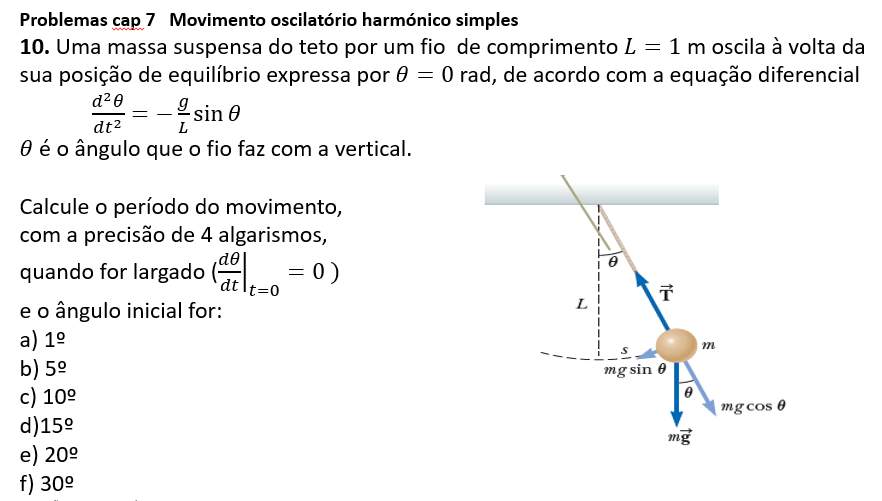
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math


def maximo(xm1,xm2,xm3,ym1,ym2,ym3):  # máximo pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
    xmax=0.5*xmla/(a+b+c)

    xta=xmax-xm1
    xtb=xmax-xm2
    xtc=xmax-xm3

    ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xmax, ymax

def zerosv(xm1,xm2,xm3,ym1,ym2,ym3):  # raiz pelo polinómio de Lagrange
    xab=xm1-xm2
    xac=xm1-xm3
    xbc=xm2-xm3

    a=ym1/(xab*xac)
    b=-ym2/(xab*xbc)
    c=ym3/(xac*xbc)

    am=a+b+c
    bm=a*(xm2+xm3)+b*(xm1+xm3)+c*(xm1+xm2)
    cm=a*xm2*xm3+b*xm1*xm3+c*xm1*xm2

    xzero=(bm+np.sqrt(bm*bm-4*am*cm))/(2*am)
    if xm3 > xm1 and (xzero < xm1 or xzero > xm3): 
        xzero=(bm-np.sqrt(bm*bm-4*am*cm))/(2*am)


    if xm1 > xm3 and (xzero < xm3 or xzero > xm1):
        xzero=(bm-np.sqrt(bm*bm-4*am*cm))/(2*am)

    xta=xzero-xm1
    xtb=xzero-xm2
    xtc=xzero-xm3
    yzero=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xzero, yzero
    
dt=0.001
tf=20.00
n=np.int(tf/dt+0.1)

t=np.linspace(0,tf,n)

teta=np.empty(n);
omega=np.empty(n);
acelAngular=np.empty(n);


teta0graus=30 #1 



teta0=math.radians(teta0graus)
omega0=0
teta[0]=teta0
omega[0]=omega0

L=1
g=9.8


countMaximos=0
maxTotal=0
difTempos=[]
maximos=[]


for i in range (0,n-1):
	acelAngular[i]=-(g/L)*math.sin(teta[i]);
	omega[i+1]=omega[i]+acelAngular[i]*dt
	teta[i+1]=teta[i]+omega[i+1]*dt #euler-cromer
	
	if i>1 and teta[i-1] < teta[i] and  teta[i+1] < teta[i]  :    # para máximo
        # print('sucess',i, y[i-1], y[i], y[i+1])
		maxt, maxx=maximo(t[i-1], t[i], t[i+1], teta[i-1], teta[i], teta[i+1])
		maximos.append(maxx)
		difTempos.append(maxt)

print(math.sin(math.radians(90)))
countMaximos=len(maximos)		
Amplitude=sum(maximos)/countMaximos #media
print("Amplitude: ",Amplitude)

sumTempos=0

# #calculo do periodo
for j in range(0,countMaximos-1):
	sumTempos+=difTempos[j+1]-difTempos[j]

Periodo=sumTempos/(countMaximos-1) #Faz a media

print("Periodo: ",Periodo)
print("Periodo Analitico para pequenas oscilações: ",2*math.pi*math.sqrt(L/g))


plt.figure()
plt.plot(t,np.degrees(teta))
# plt.plot(t,energia,label='W Res')
plt.ylabel('$\Theta$(º)')
plt.xlabel( 't (s)' )
plt.grid()

plt.show()

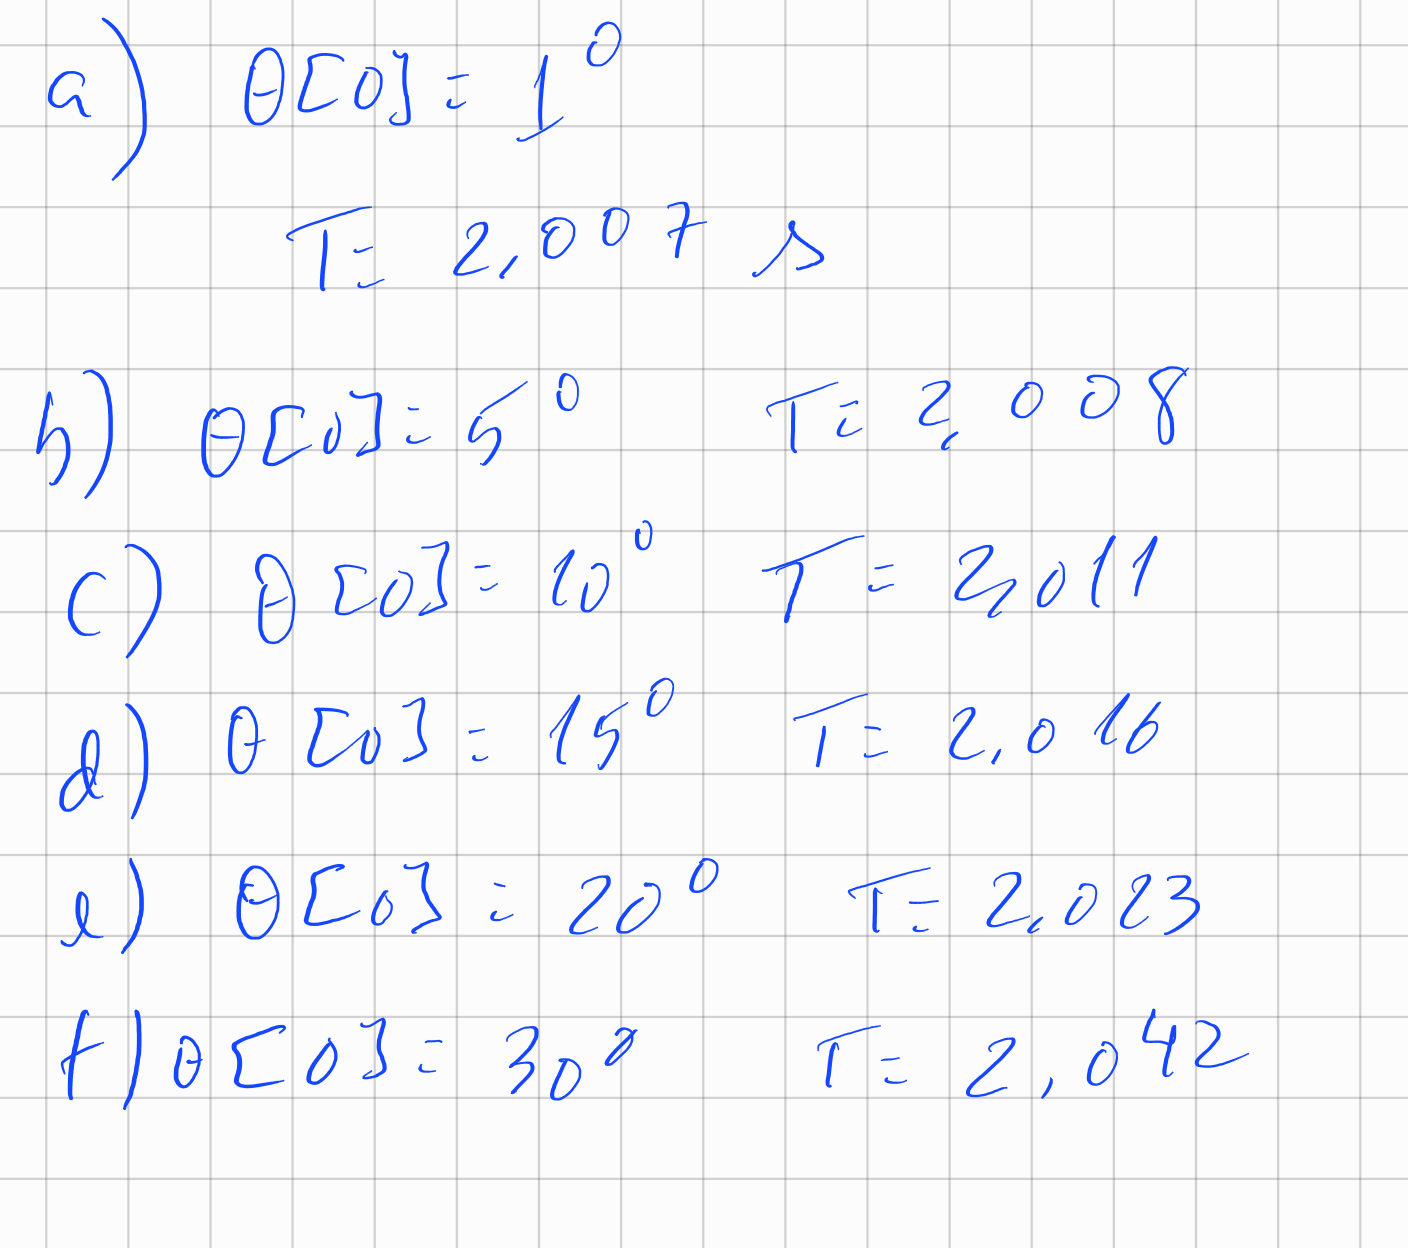

# Capítulo 8
## 1
Um corpo de massa 1 kg move-se num oscilador harmónico forçado. Se a posição de equilíbrio for a origem do eixo 𝑥_𝑒𝑞=0 m, o oscilador harmónico tem a energia potencial 		𝐸_𝑝=1/2 𝑘 〖 𝑥〗^2
e exerce no corpo a força  		〖 𝐹〗_𝑥=−𝑘 𝑥  


O oscilador é amortecido pela força −𝑏𝑣_𝑥 e sujeito à força externa 𝐹_0  cos⁡(𝜔_𝑓 𝑡). Considere 𝑘=1 N/m, 𝑏=0.05 kg/s, 𝐹_0=7.5 N e 𝜔_𝑓=1.0 rad/s.


a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 4 m. Tem confiança no seu resultado?


n 400000


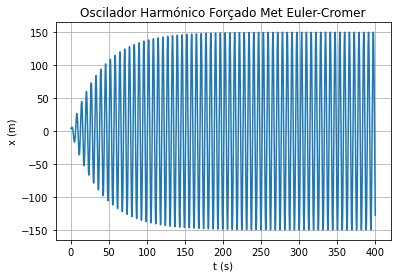

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author:carlos Azevedo
"""

# Oscilador de Harmónico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt



dt=0.001
tf=400.0
n=np.int(tf/dt+0.1)
print('n',n)

tempo=np.empty(n+1)
x=np.empty(n+1)
vx=np.empty(n+1)
a=np.empty(n+1)
Em=np.empty(n+1)
	  
t0=0.
x0=4.0            
vx0=0.0

tempo[0]=t0
vx[0]=vx0
x[0]=x0

k=1
m=1
b=0.05
F0=7.5
Wf=1
ampl=0
countMax=0
tMax=[]
periodo=[]

for i in range(n):
	tempo[i+1]=tempo[i]+dt
	a[i]=-(k/m)*x[i]-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
	vx[i+1]=vx[i]+a[i]*dt
	x[i+1]=x[i]+vx[i+1]*dt

plt.title('Oscilador Harmónico Forçado Met Euler-Cromer')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.grid()    
plt.plot(tempo,x)
plt.show()	




b. Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos.


n 400000
Amplitude  149.79891747596724
Amplitude_teo  150.0
Periodo  6.283193548287447


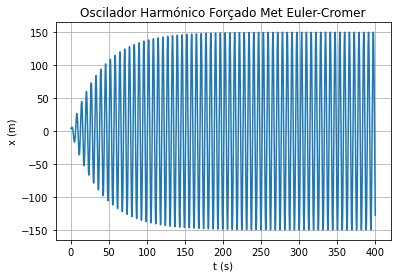

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author:carlos Azevedo
"""

# Oscilador de Harmónico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt



# def maximo(xm1,xm2,xm3,ym1,ym2,ym3):
#     xab=xm1-xm2
#     xac=xm1-xm3
#     xbc=xm2-xm3

#     a=ym1/(xab*xac)
#     b=-ym2/(xab*xbc)
#     c=ym3/(xac*xbc)

#     xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
#     xmax=0.5*xmla/(a+b+c)

#     xta=xmax-xm1
#     xtb=xmax-xm2
#     xtc=xmax-xm3

#     ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
#     return xmax, ymax



dt=0.001
tf=400.0
n=np.int(tf/dt+0.1)
print('n',n)

tempo=np.empty(n+1)
x=np.empty(n+1)
vx=np.empty(n+1)
a=np.empty(n+1)
enec=np.empty(n+1)
	  
t0=0.
x0=4.0            
vx0=0.0

tempo[0]=t0
vx[0]=vx0
x[0]=x0

k=1
m=1
b=0.05
F0=7.5
Wf=1
W0 = np.sqrt(k/m)
ampl=0
countMax=0
tMax=[]
periodo=[]

for i in range(n):
	tempo[i+1]=tempo[i]+dt
	a[i]=-(k/m)*x[i]-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
	vx[i+1]=vx[i]+a[i]*dt
	x[i+1]=x[i]+vx[i+1]*dt
	if tempo[i]>200 and x[i-1] < x[i] >  x[i+1] :
		#maxx, maxy=maximo(tempo[i-1], tempo[i], tempo[i+1], x[i-1], x[i], x[i+1])
		maxy=x[i]
		ampl=ampl+maxy
		countMax=countMax+1
		tMax.append(tempo[i])
		


amplAverage=ampl/countMax

sumTempos=0
countMaximos=len(tMax)
#calculo do periodo

#Periodo=(tMax[-1]-tMax[0])/(countMax-1)   #tMax[-1] é o ultimo indice de tMax

for j in range(0,countMaximos-1):
	sumTempos+=tMax[j+1]-tMax[j]

Periodo=sumTempos/(countMaximos-1) #Faz a media



amp_teo = (F0/m)/np.sqrt((Wf**2-W0)**2+(b*Wf/m)**2)
print('Amplitude ',amplAverage)
print('Amplitude_teo ',amp_teo)
print('Periodo ',Periodo)

	




plt.title('Oscilador Harmónico Forçado Met Euler-Cromer')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.grid()    
plt.plot(tempo,x)
plt.show()	




c) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é    -4 m/s e a posição inicial -2 m.


n 400000


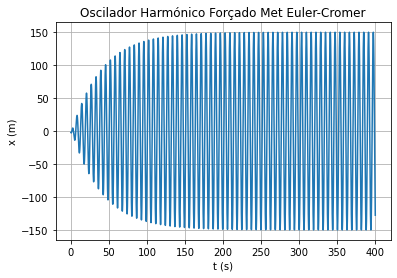

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author:carlos Azevedo
"""

# Oscilador de Harmónico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt




dt=0.001
tf=400.0
n=np.int(tf/dt+0.1)
print('n',n)

tempo=np.empty(n+1)
x=np.empty(n+1)
vx=np.empty(n+1)
a=np.empty(n+1)
Em=np.empty(n+1)
	  
t0=0.
x0=-2.0            
vx0=-4.0

tempo[0]=t0
vx[0]=vx0
x[0]=x0

k=1
m=1
b=0.05
F0=7.5
Wf=1
ampl=0
countMax=0
tMax=[]
periodo=[]

for i in range(n):
	tempo[i+1]=tempo[i]+dt
	a[i]=-(k/m)*x[i]-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
	vx[i+1]=vx[i]+a[i]*dt
	x[i+1]=x[i]+vx[i+1]*dt



plt.title('Oscilador Harmónico Forçado Met Euler-Cromer')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.grid()    
plt.plot(tempo,x)
plt.show()	


d) Calcule a amplitude do movimento e o seu período no regime estacionário, usando os resultados numéricos calculados na alínea anterior.


n 400000
Amplitude  149.79276143051212
Periodo  6.283193548287447
A amplitude no regime estacionário não depende das condições iniciais


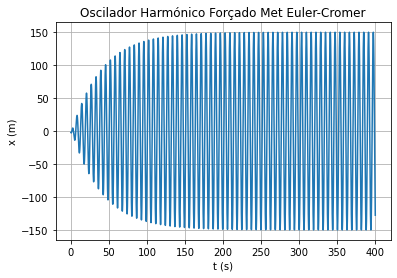

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author:carlos Azevedo
"""

# Oscilador de Harmónico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt


dt=0.001
tf=400.0
n=np.int(tf/dt+0.1)
print('n',n)

tempo=np.empty(n+1)
x=np.empty(n+1)
vx=np.empty(n+1)
a=np.empty(n+1)
enec=np.empty(n+1)
	  
t0=0.
x0=-2.0            
vx0=-4.0

tempo[0]=t0
vx[0]=vx0
x[0]=x0

k=1
m=1
b=0.05
F0=7.5
Wf=1
ampl=0
countMax=0
tMax=[]
periodo=[]

for i in range(n):
	tempo[i+1]=tempo[i]+dt
	a[i]=-(k/m)*x[i]-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
	vx[i+1]=vx[i]+a[i]*dt
	x[i+1]=x[i]+vx[i+1]*dt
	if tempo[i]>200 and x[i-1] < x[i] >  x[i+1] :
		#maxx, maxy=maximo(tempo[i-1], tempo[i], tempo[i+1], x[i-1], x[i], x[i+1])
		maxy=x[i]
		ampl=ampl+maxy
		countMax=countMax+1
		tMax.append(tempo[i])
		


amplAverage=ampl/countMax

sumTempos=0
countMaximos=len(tMax)
#calculo do periodo

#Periodo=(tMax[-1]-tMax[0])/(countMax-1)   #tMax[-1] é o ultimo indice de tMax

for j in range(0,countMaximos-1):
	sumTempos+=tMax[j+1]-tMax[j]

Periodo=sumTempos/(countMaximos-1) #Faz a media


print('Amplitude ',amplAverage)
print('Periodo ',Periodo)
print("A amplitude no regime estacionário não depende das condições iniciais")



plt.title('Oscilador Harmónico Forçado Met Euler-Cromer')
plt.xlabel('t (s)')
plt.ylabel('x (m)')
plt.grid()    
plt.plot(tempo,x)
plt.show()	




e) Calcule a energia mecânica. É constante ao longo do tempo?


n 400000


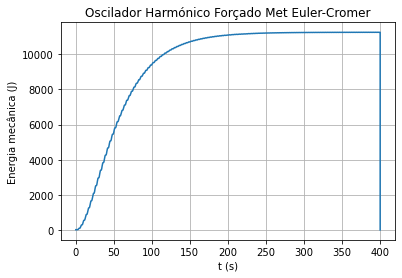

In [15]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author:carlos Azevedo
"""

# Oscilador de Harmónico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt



# def maximo(xm1,xm2,xm3,ym1,ym2,ym3):
#     xab=xm1-xm2
#     xac=xm1-xm3
#     xbc=xm2-xm3

#     a=ym1/(xab*xac)
#     b=-ym2/(xab*xbc)
#     c=ym3/(xac*xbc)

#     xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
#     xmax=0.5*xmla/(a+b+c)

#     xta=xmax-xm1
#     xtb=xmax-xm2
#     xtc=xmax-xm3

#     ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
#     return xmax, ymax







dt=0.001
tf=400.0
n=np.int(tf/dt+0.1)
print('n',n)

tempo=np.empty(n+1)
x=np.empty(n+1)
vx=np.empty(n+1)
a=np.empty(n+1)
en=np.empty(n+1)
enec=np.empty(n+1)
	  
t0=0.
x0=-2.0            
vx0=-4.0

tempo[0]=t0
vx[0]=vx0
x[0]=x0

k=1
m=1
b=0.05
F0=7.5
Wf=1
ampl=0
countMax=0
tMax=[]
periodo=[]


for i in range(n):
	tempo[i+1]=tempo[i]+dt
	a[i]=-(k/m)*x[i]-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
	vx[i+1]=vx[i]+a[i]*dt
	x[i+1]=x[i]+vx[i+1]*dt
	en[i]=0.5*m*vx[i]**2+0.5*k*x[i]**2


plt.title('Oscilador Harmónico Forçado Met Euler-Cromer')
plt.xlabel('t (s)')
plt.ylabel('Energia mecânica (J)')
plt.grid()    
plt.plot(tempo,en)
plt.show()



f) Calcule os coeficientes de Fourier do movimento do regime estacionário nas condições das alíneas a) e c). Que conclusões retira da lei do movimento do regime estacionário?!

n 24000
23781
23907


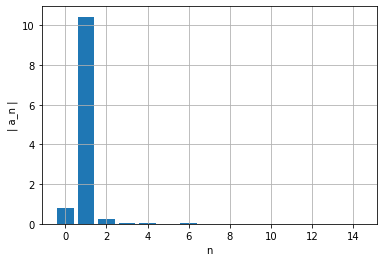

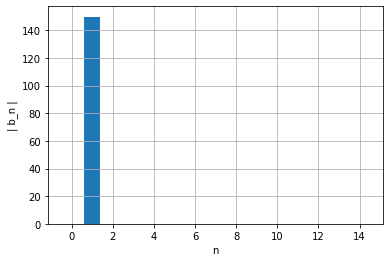

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author:carlos Azevedo
"""

# Oscilador de Harmónico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt



##DO ELEARNING
def abfourier(tp,xp,it0,it1,nf):
#
# cálculo dos coeficientes de Fourier a_nf e b_nf
#       a_nf = 2/T integral ( xp cos( nf w) ) dt   entre tp(it0) e tp(it1)
#       b_nf = 2/T integral ( xp sin( nf w) ) dt   entre tp(it0) e tp(it1)    
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp   (abcissas)
#                 posição xp (ordenadas) 
#       indices inicial it0
#               final   it1  (ao fim de um período)   
#       nf índice de Fourier
# output: af_bf e bf_nf  
# 
    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per

    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return af,bf




dt=0.05
tf=1200.0
n=np.int(tf/dt+0.1)
print('n',n)

tempo=np.empty(n+1)
x=np.empty(n+1)
vx=np.empty(n+1)
a=np.empty(n+1)
en=np.empty(n+1)
enec=np.empty(n+1)
	  
t0=0.
x0=-2          
vx0=-4

tempo[0]=t0
vx[0]=vx0
x[0]=x0

k=1
m=1
b=0.05
F0=7.5
Wf=1
ampl=0
countMax=0
tMax=[]
periodo=[]


ind=np.transpose([0 for i in range(1000)])

afo=np.zeros(15)
bfo=np.zeros(15)


for i in range(n):
	tempo[i+1]=tempo[i]+dt
	a[i]=-(k/m)*x[i]-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
	vx[i+1]=vx[i]+a[i]*dt
	x[i+1]=x[i]+vx[i+1]*dt
	en[i]=0.5*m*vx[i]**2+0.5*k*x[i]**2
	if tempo[i]>200 and x[i-1] < x[i] and  x[i+1] < x[i]  :
		# maxx, maxy=maximo(tempo[i-1], tempo[i], tempo[i+1], x[i-1], x[i], x[i+1])
		# ampl=ampl+maxy
		countMax=countMax+1
		ind[countMax]=int(i) #NOTA TEM DE SER UM INT
		


t0=ind[countMax-1]
t1=ind[countMax]   
print(t0)
print(t1)
for i in range(15):
    af, bf=abfourier(tempo,x,t0,t1,i)
    afo[i]=af
    bfo[i]=bf
    # print('afo = ',i,af,bf,np.sqrt(af**2+bf**2))



ii=np.linspace(0,14,15)
plt.figure()
plt.ylabel('| a_n |')
plt.xlabel('n')
plt.bar(ii,np.abs(afo))
plt.grid()
plt.show()



ii=np.linspace(0,14,15)
plt.figure()
plt.ylabel('| b_n |')
plt.xlabel('n')
plt.bar(ii,np.abs(bfo))
plt.grid()
plt.show()

